<a href="https://colab.research.google.com/github/yellowlarva-sketch/aml-fraud-detection/blob/main/01_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IBM Transactions for Anti Money Laundering

We aim to develop a predictive model that identifies potential money laundering cases by analyzing patterns in historical account transaction data.

Import Data from Kaggle Project
https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml/code

In [41]:
# Connect drive to save data
from google.colab import drive
drive.mount('/content/drive')

# Set directory
main_dir = '/content/drive/My Drive/Colab Notebooks/'
input_dir = main_dir + '/00_inputs/'
script_dir = main_dir + '/01_scripts/'
output_dir = main_dir + '/02_outputs/'
non_predictive_cols = ['target', 'date']

# Import libraries
# !pip install scorecardpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scorecardpy import woebin_plot, woebin
import warnings
warnings.filterwarnings("ignore")
import os
os.chdir(script_dir)

In [61]:
# Import data
df = pd.read_csv(input_dir + '/HI-Small_Trans.csv')
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [62]:
# Set column name
id_col = 'Account'
target = 'Is Laundering'

print("Number of transactions:", len(df), df.shape)
print("Number of unique account ID:", df[id_col].nunique())
print("Number of counterparty account ID:", df['Account.1'].nunique())
print("Date range:", min(df['Timestamp']), max(df['Timestamp']))

Number of transactions: 5078345 (5078345, 11)
Number of unique account ID: 496995
Number of counterparty account ID: 420636
Date range: 2022/09/01 00:00 2022/09/18 16:18


In [79]:
df['Timestamp'].str[:10].value_counts().sort_index()

,count
Timestamp,
2022/09/01,1114921
2022/09/02,754449
2022/09/03,207382
2022/09/04,207430
2022/09/05,482650
2022/09/06,482089
2022/09/07,482751
2022/09/08,482773
2022/09/09,654467


In [64]:
pd.concat([df[target].value_counts(),
           df[target].value_counts(normalize=True)]
          , axis=1)

,count,proportion
Is Laundering,,
0,5073168,0.998981
1,5177,0.001019


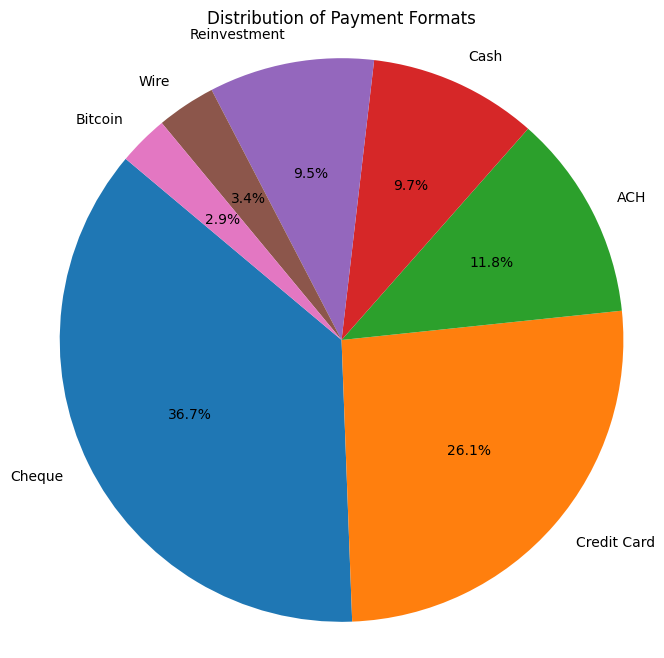

In [72]:
df['Payment Format'].value_counts().plot(kind='pie')

[INFO] creating woe binning ...
Binning on 5078345 rows and 3 columns in 00:01:29


{'Amount Received': <Figure size 640x480 with 2 Axes>,
 'Amount Paid': <Figure size 640x480 with 2 Axes>}

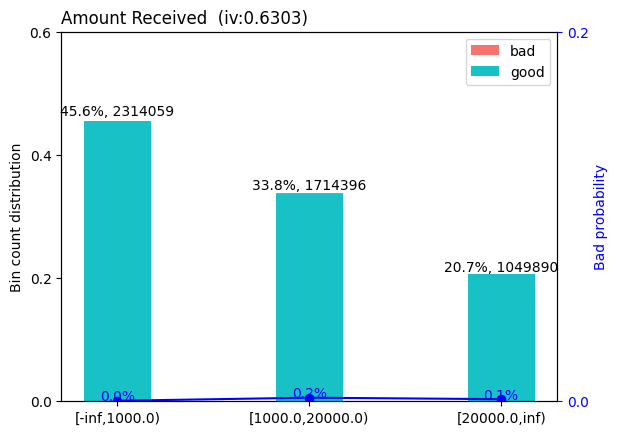

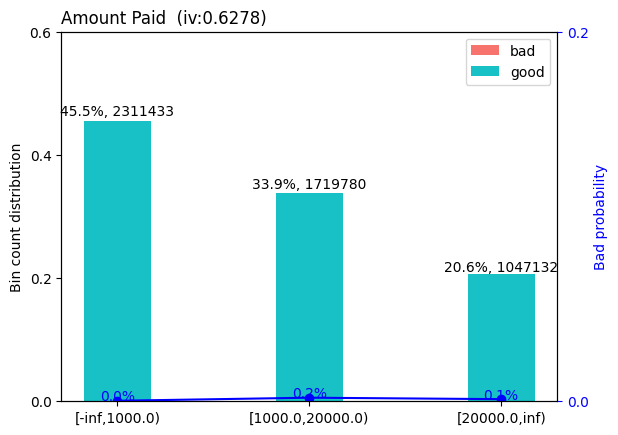

In [83]:
bins = woebin(df[['Amount Received','Amount Paid'] + [target]], y=target,
              bin_num_limit=5, count_distr_limit=0.05)

# Generate WOE plots for each binned variable
woebin_plot(bins)